In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import choice
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

# Mall Customer Segmentation

In [2]:
#load dataset
df_customer = pd.read_csv('Mall_Customers.csv')

In [3]:
#show 5 rows of dataset
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)

In [4]:
#check total rows and columns of dataset
df_customer.shape

(200, 5)

In [5]:
#check missing value
df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#indexing customerID
df_customer = df_customer.set_index('CustomerID')
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
#describe of dataset
df_customer.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
#show info of dataset
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


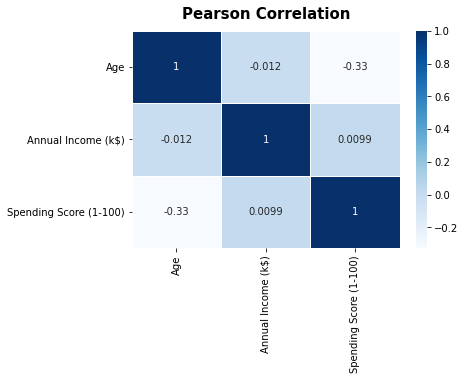

In [9]:
#visualize correlation matrix of each variable using pearson correlation
sns.heatmap(df_customer.corr(), linewidths = 0.5, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

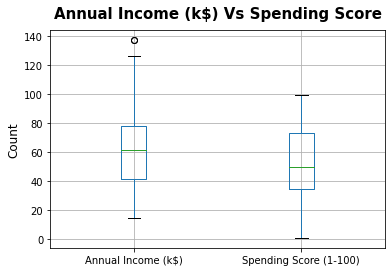

Maximum of Annual Income (k$) :  137
Median of Annual Income (k$) :  61.5
Minimum of Annual Income (k$) :  15


Maximum of Spending Score :  99
Median of Spending Score :  50.0
Minimum of Spending Score :  1


In [10]:
#check outlier 
df_customer.boxplot(column = ['Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Annual Income (k$) Vs Spending Score', fontsize = 15, pad = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12)
plt.show()

print('Maximum of Annual Income (k$) : ', df_customer['Annual Income (k$)'].max())
print('Median of Annual Income (k$) : ', df_customer['Annual Income (k$)'].median())
print('Minimum of Annual Income (k$) : ', df_customer['Annual Income (k$)'].min())
print('\n')
print('Maximum of Spending Score : ', df_customer['Spending Score (1-100)'].max())
print('Median of Spending Score : ', df_customer['Spending Score (1-100)'].median())
print('Minimum of Spending Score : ', df_customer['Spending Score (1-100)'].min())

In [11]:
#check unique of gender column
df_customer['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
#check number of gender column
df_customer['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

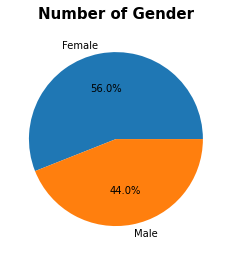

In [13]:
#visualize number of gender
status = [np.count_nonzero(df_customer['Gender'] == 'Female'),
         np.count_nonzero(df_customer['Gender'] == 'Male')]
activities = ['Female', 'Male']
plt.pie(status, labels = activities, autopct = '%.1f%%')
plt.title('Number of Gender', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

In [14]:
#analyze total annual income based on gender
pd.pivot_table(df_customer, index = 'Gender', values = 'Annual Income (k$)', 
               aggfunc = {'Annual Income (k$)' : np.sum}).sort_values('Annual Income (k$)', ascending = False)

,Annual Income (k$)
Gender,
Female,6636
Male,5476


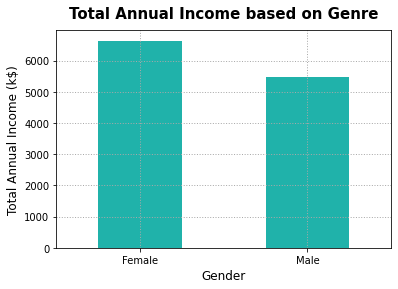

In [15]:
#visualize total annual income based on gender
chart = df_customer.groupby('Gender')['Annual Income (k$)'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                      color = 'lightseagreen')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Total Annual Income based on Genre', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Total Annual Income (k$)', fontsize = 12)
plt.show()

In [16]:
#analyze total spending score based on gender
pd.pivot_table(df_customer, index = 'Gender', values = 'Spending Score (1-100)', 
               aggfunc = {'Spending Score (1-100)' : np.sum}).sort_values('Spending Score (1-100)', ascending = False)

,Spending Score (1-100)
Gender,
Female,5771
Male,4269


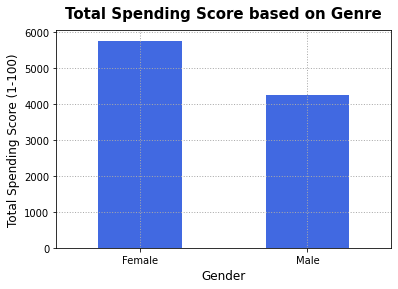

In [17]:
#visualize total spending score based on gender
chart = df_customer.groupby('Gender')['Spending Score (1-100)'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                          color = 'royalblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Total Spending Score based on Genre', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Total Spending Score (1-100)', fontsize = 12)
plt.show()

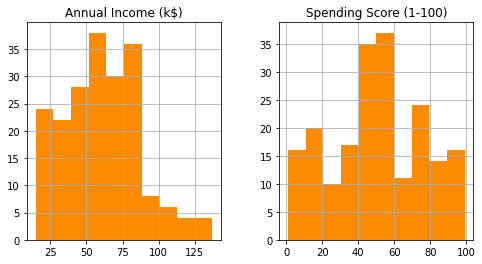

In [18]:
#visualize distribution of annual income and spending score
df_customer.hist(column = ['Annual Income (k$)', 'Spending Score (1-100)'], color = 'darkorange', figsize = (8,4))
plt.show()

In [19]:
#feature scaling for transform label
le = LabelEncoder()
df_customer['Gender'] = le.fit_transform(df_customer['Gender'])
df_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [20]:
#feature scaling for normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_customer)
df_norm = pd.DataFrame(data_scaled, columns = df_customer.columns)
df_norm.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


## K-Means Clustering 

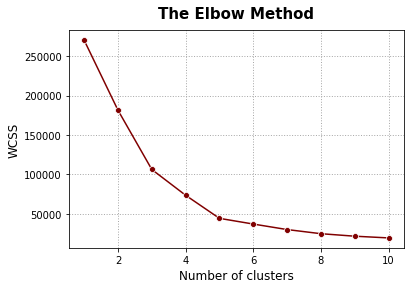

In [21]:
#using only spending score and income variable for easy visualisation
X = df_customer.iloc[:, [2, 3]].values

#using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#visualize the elbow method 
sns.lineplot(range(1, 11), wcss, marker = 'o', color = 'maroon')
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('The Elbow Method', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.show()

In [22]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


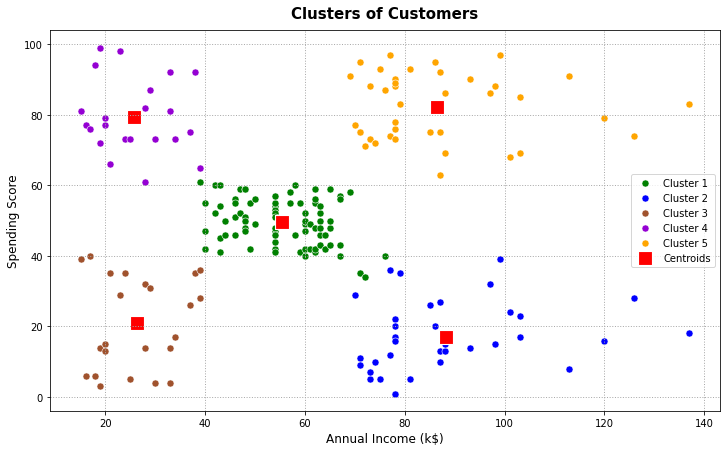

In [23]:
#visualize the clusters
plt.figure(figsize = (12,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'green', label = 'Cluster 1', s = 50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'sienna', label = 'Cluster 3', s = 50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'darkviolet', label = 'Cluster 4', s = 50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5', s = 50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids', s = 200, 
                marker = ',')
plt.grid(False)
plt.title('Clusters of Customers', fontsize = 15, pad = 12, fontweight = 'bold')
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.show()

## K-Modes Clustering

In [24]:
#fitting K-Modes to dataset with cao initialization 
kmodes_cao = KModes(n_clusters = 5, init = 'Cao', n_init = 1, verbose = 1)
y_kmodes_cao = kmodes_cao.fit_predict(df_customer)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 530.0


In [25]:
#prediction
print(y_kmodes_cao)

[1 1 0 0 0 0 0 0 1 2 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 2 1 1 0 0 0
 2 0 0 0 1 1 0 0 0 0 3 0 0 0 1 0 1 0 1 4 1 4 1 1 1 0 0 1 1 3 3 1 3 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 4 0 1 3 4 0 1 0 0 1 1 1 0 4 1 1 1 1
 0 0 1 0 4 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 3 1 1 1 3
 2 1 1 1 2 2 2 2 1 2 1 2 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 2 1 1 1 1 0 3 1 0 0
 1 0 1 0 0 0 3 1 0 0 0 0 1 1 1]


In [26]:
#create dataframe for build clusters
cluster = pd.DataFrame(kmodes_cao.cluster_centroids_)
cluster.columns = df_customer.columns
cluster 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,31,54,42
1,1,19,71,46
2,0,30,78,73
3,0,32,48,47
4,0,27,60,50


In [27]:
#fitting K-Modes to dataset with huang initialization 
kmodes_huang = KModes(n_clusters = 5, init = 'Huang', n_init = 1, verbose = 1)
y_kmodes_huang = kmodes_huang.fit_predict(df_customer)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 543.0
Run 1, iteration: 2/100, moves: 2, cost: 543.0


In [28]:
#prediction
print(y_kmodes_huang)

[2 2 0 0 1 3 0 0 2 0 2 0 0 0 2 2 0 2 2 0 2 2 4 1 0 2 0 2 0 0 2 0 2 2 0 0 0
 0 0 0 0 2 2 1 0 0 3 0 0 0 0 2 1 2 0 2 0 2 0 2 2 2 0 0 2 2 0 0 2 0 2 0 0 0
 2 2 0 2 0 0 2 2 2 4 0 2 0 3 0 0 3 2 2 0 0 2 0 0 0 2 0 0 2 2 2 0 0 2 2 2 2
 0 0 2 0 0 0 0 0 0 2 0 0 2 0 1 2 2 2 2 2 2 0 1 2 0 0 2 2 0 4 1 0 0 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 2 0 0
 2 0 2 0 0 0 0 2 0 0 0 0 2 2 2]


In [29]:
#append list cost of kmodes with cao initialization
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters = num_clusters, init = 'Cao', n_init = 1, verbose = 1)
    kmode.fit_predict(df_customer)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 538.0


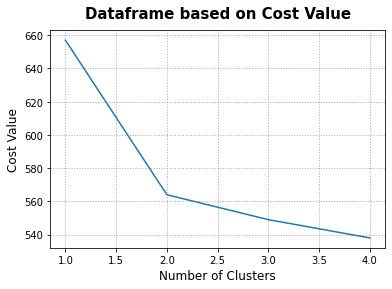

In [30]:
#plotting dataframe based on cost
y = np.array([i for i in range(1,5,1)])
plt.plot(y, cost)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Dataframe based on Cost Value', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Cost Value', fontsize = 12)
plt.show()

In [31]:
#combining prediction of cluster with original dataframe
df_customer_copy = df_customer.copy()
df_customer = df_customer_copy.reset_index()

cluster_df = pd.DataFrame(y_kmodes_cao)
cluster_df.columns = ['cluster_predicted']
combine_df = pd.concat([df_customer, cluster_df], axis = 1).reset_index()
combine_df = combine_df.drop('index', axis = 1)
combine_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_predicted
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


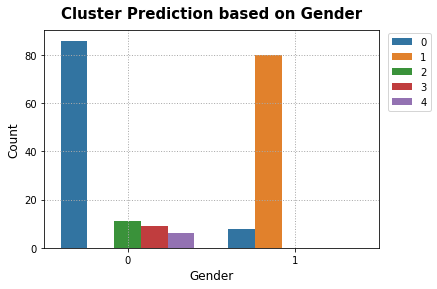

In [32]:
#visualize the result based on attribute
sns.countplot(x = combine_df['Gender'], order = combine_df['Gender'].value_counts().index, 
              hue = combine_df['cluster_predicted'])
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Cluster Prediction based on Gender', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend(loc = 'right', bbox_to_anchor = (1.17, 0.81), ncol = 1)
plt.show()

## K-Medoids Clustering 

In [33]:
#define function for initialization of medoids
def init_medoids(X, k):
    samples = choice(len(X), size = k, replace = False)
    return X.iloc[samples, :]

medoids_initial = init_medoids(df_norm, 3)
print(medoids_initial)

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
193     0.0  0.384615            0.803279                0.918367
54      0.0  0.615385            0.229508                0.448980
158     1.0  0.307692            0.516393                0.000000


In [34]:
#define function for distances of medoids
def distance(X, medoids):
    m = len(X)
    X = X.values
    medoids_shape = medoids.shape
    
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)
    S = np.empty((m, k))
    
    for i in range(m):
        S[i, :] = np.linalg.norm(medoids - X[i, :], axis = 1).reshape(1, len(medoids))
    return S

print('==========EUCLIDEAN DISTANCE==========\n')
first_distance = distance(df_norm, medoids_initial)
np.set_printoptions(threshold = 5)
print(first_distance)

==========EUCLIDEAN DISTANCE==========

[[1.43537867 1.1882011  0.70726676]
 [1.32760976 1.22418891 0.99777312]
 [1.22648625 0.73497654 1.15470871]
 ...
 [1.02701495 1.29237617 0.84329672]
 [1.26763001 1.33767933 0.51521473]
 [1.03393994 1.37547833 0.96949338]]


In [35]:
#define function for result of first clustering
def clustering(S):
    return np.argmin(S, axis = 1)

first_cluster = clustering(first_distance)
print('===========================RESULT FIRST CLUSTERING==========================\n')
np.set_printoptions(threshold = np.inf)
print(first_cluster)

===========================RESULT FIRST CLUSTERING==========================

[2 2 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 2 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 2 2 1 1 2 2 1 1 2 1 2 1 1 1
 2 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 2 2 1 1 2 2 2 2
 1 1 2 1 1 1 1 1 1 2 1 1 2 1 0 2 2 2 2 2 2 1 0 2 0 1 2 2 0 1 2 1 0 2 2 2 0
 1 2 2 2 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 2 2 2 2 2 1 0 2 2 2 2 1 0 2 0 1
 2 1 2 1 0 1 0 2 0 1 0 0 2 2 2]


In [36]:
#check silhouette coefficient
silhouette_avg = silhouette_score(df_norm, first_cluster)
print('Silhouette Score : ', silhouette_avg)

Silhouette Score :  0.3439200191201821


In [37]:
#PCA transformation
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(df_norm)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component I', 'principal component II', 
                                                             'principal component III'])

datapoints = PCAdf.values
PCAdf.head()

,principal component I,principal component II,principal component III
0,0.532955,-0.227841,0.321860
1,0.513939,-0.493080,-0.016202
2,-0.446266,0.087079,0.555761
3,-0.478796,-0.366617,-0.010714
4,-0.451984,0.003006,0.159208


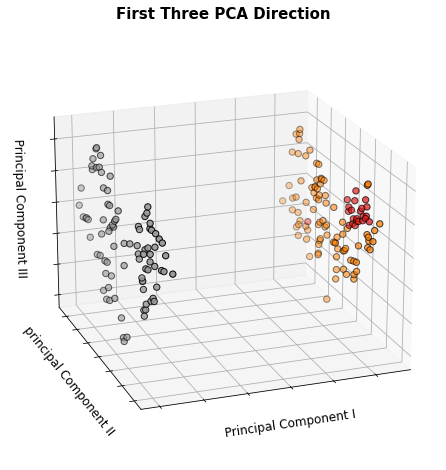

In [38]:
#visualize PCA transformation
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev = 200, azim = 110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = first_cluster, cmap = plt.cm.Set1, edgecolor = 'k', s = 40)
ax.set_title('First Three PCA Direction', fontsize = 15, pad = 12, fontweight = 'bold')
ax.set_xlabel('Principal Component I', fontsize = 12)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('principal Component II', fontsize = 12)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Principal Component III', fontsize = 12)
ax.w_zaxis.set_ticklabels([])
plt.show()

In [39]:
#adding result cluster to original dataframe
df_customer['Cluster'] = first_cluster
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


# Facebook Live Sellers in Thailand

In [40]:
#load dataset
df_facebook = pd.read_csv('Live.csv')

In [41]:
#show 5 rows of dataset
df_facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

In [42]:
#check total rows and columns of dataset
df_facebook.shape

(7050, 16)

In [43]:
#check missing value
df_facebook.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [44]:
#drop attributes of dataset
df_facebook = df_facebook.drop(columns = ['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'])
df_facebook.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [45]:
#describe dataset
df_facebook.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [46]:
#check info of dataset
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


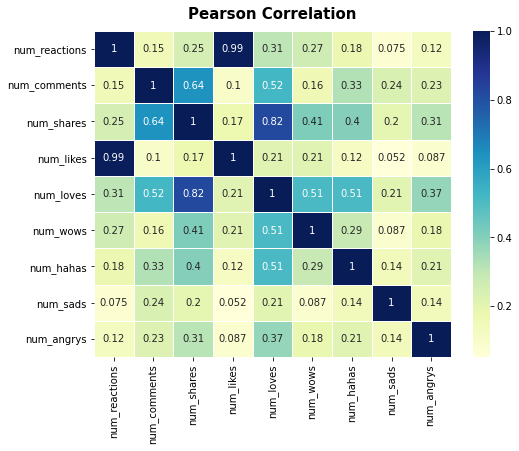

In [47]:
#visualize correlation matrix of each variables using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df_facebook.corr(), linewidths = 0.9, annot = True, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

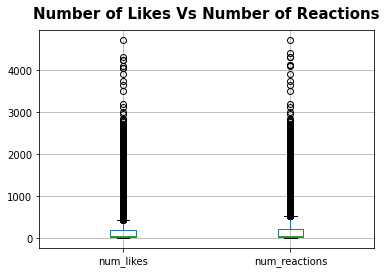

Maximum Number of Likes :  4710
Median Number of Likes :  58.0
Minimum Number of Likes :  0


Maximum Number of Reactions :  4710
Median Number of Reactions :  59.5
Minimum Number of Reactions :  0


In [48]:
#check outlier
df_facebook.boxplot(column = ['num_likes', 'num_reactions'])
plt.title('Number of Likes Vs Number of Reactions', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

print('Maximum Number of Likes : ', df_facebook['num_likes'].max())
print('Median Number of Likes : ', df_facebook['num_likes'].median())
print('Minimum Number of Likes : ', df_facebook['num_likes'].min())
print('\n')
print('Maximum Number of Reactions : ', df_facebook['num_reactions'].max())
print('Median Number of Reactions : ', df_facebook['num_reactions'].median())
print('Minimum Number of Reactions : ', df_facebook['num_reactions'].min())

In [49]:
#check unique of status type column
df_facebook['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [50]:
#check number of status type column
df_facebook['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

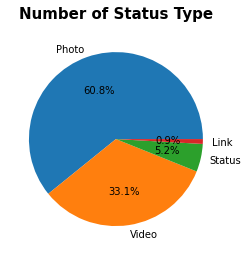

In [51]:
#visualize number of status type
status = [np.count_nonzero(df_facebook['status_type'] == 'photo'),
         np.count_nonzero(df_facebook['status_type'] == 'video'),
         np.count_nonzero(df_facebook['status_type'] == 'status'),
         np.count_nonzero(df_facebook['status_type'] == 'link')]
activities = ['Photo', 'Video', 'Status', 'Link']
plt.pie(status, labels = activities, autopct = '%.1f%%')
plt.title('Number of Status Type', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

In [52]:
#analyze total likes based on status type
pd.pivot_table(df_facebook, index = 'status_type', values = 'num_likes',
              aggfunc = {'num_likes' : np.sum}).sort_values('num_likes', ascending = False)

,num_likes
status_type,
photo,766602
video,567198
status,158968
link,23286


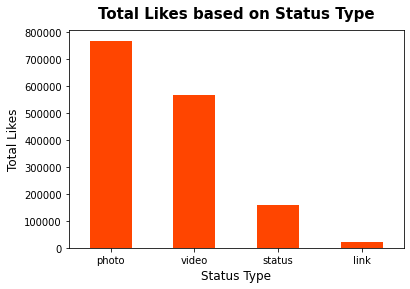

In [53]:
#visualize total likes based on status type
chart = df_facebook.groupby('status_type')['num_likes'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Total Likes based on Status Type', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Status Type', fontsize = 12)
plt.ylabel('Total Likes', fontsize = 12)
plt.show()

In [54]:
#analyze total reactions based on status type
pd.pivot_table(df_facebook, index = 'status_type', values = 'num_reactions',
              aggfunc = {'num_reactions' : np.sum}).sort_values('num_reactions', ascending = False)

,num_reactions
status_type,
photo,777373
video,661478
status,160156
link,23319


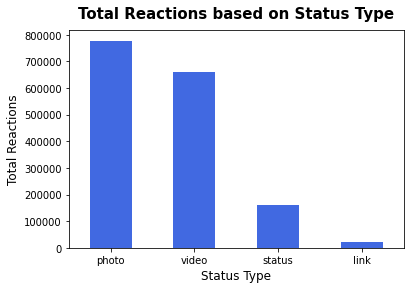

In [55]:
#visualize total reactions based on status type
chart = df_facebook.groupby('status_type')['num_reactions'].sum().sort_values(ascending = False).plot(kind = 'bar',
                                                                                                     color = 'royalblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Total Reactions based on Status Type', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Status Type', fontsize = 12)
plt.ylabel('Total Reactions', fontsize = 12)
plt.show()

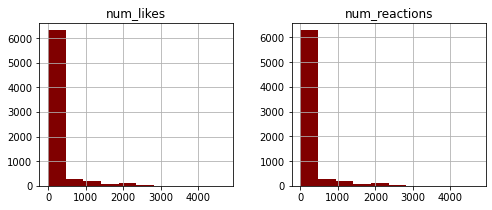

In [56]:
#visualize distribution of number of likes and number of reactions
df_facebook.hist(column = ['num_likes', 'num_reactions'], figsize = (8,3), color = 'maroon')
plt.show()

In [57]:
#feature scaling for transform label
le = LabelEncoder()
df_facebook['status_type'] = le.fit_transform(df_facebook['status_type'])
df_facebook.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [58]:
#feature scaling for normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_facebook)
df_norm = pd.DataFrame(data_scaled, columns = df_facebook.columns)
df_norm.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## K-Means Clustering

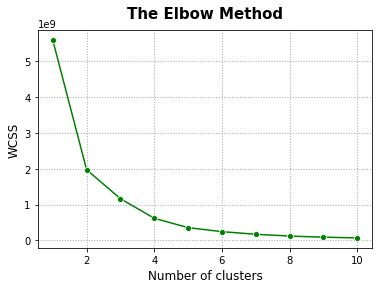

In [59]:
#using only number of likes and number of reactions for easy visualisation
X = df_facebook.iloc[:, [5, 2]].values

#using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#visualize the elbow method 
sns.lineplot(range(1, 11), wcss, marker = 'o', color = 'green')
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('The Elbow Method', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.show()

In [60]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 1
 0 4 0 0 0 0 0 0 0 0 0 0 

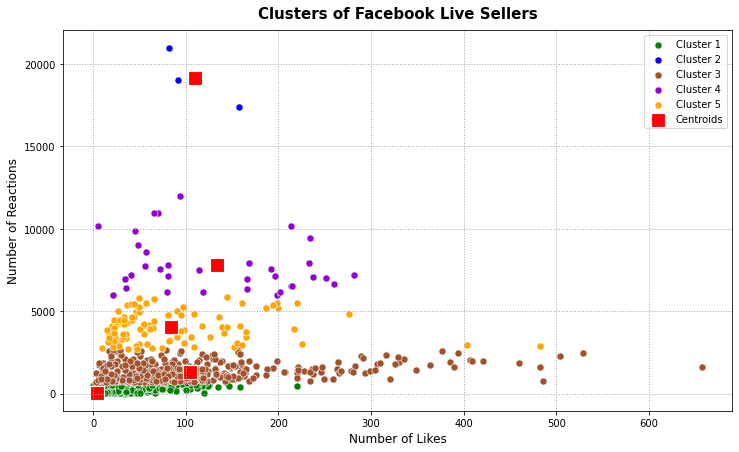

In [61]:
#visualize the clusters
plt.figure(figsize = (12,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'green', label = 'Cluster 1', s = 50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'sienna', label = 'Cluster 3', s = 50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'darkviolet', label = 'Cluster 4', s = 50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5', s = 50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids', s = 200, 
                marker = ',')
plt.grid(False)
plt.title('Clusters of Facebook Live Sellers', fontsize = 15, pad = 12, fontweight = 'bold')
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.xlabel('Number of Likes', fontsize = 12)
plt.ylabel('Number of Reactions', fontsize = 12)
plt.legend()
plt.show()

## K-Modes Clustering

In [62]:
#fitting K-Modes to dataset with cao initialization 
kmodes_cao = KModes(n_clusters = 5, init = 'Cao', n_init = 1, verbose = 1)
y_kmodes_cao = kmodes_cao.fit_predict(df_facebook)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 29046.0


In [63]:
#prediction
print(y_kmodes_cao)

[1 0 2 0 0 0 1 2 0 0 2 0 0 0 0 2 1 2 1 0 0 0 0 0 0 0 1 1 0 2 0 4 0 0 0 0 1
 0 0 2 2 2 1 1 0 2 0 1 1 1 0 1 0 2 1 2 1 1 1 1 0 2 0 1 0 0 2 1 1 1 0 2 1 2
 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 4 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 2 1 1 2 2 1 0 0 1 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 1 0 2 2 1 0 0
 1 2 0 1 2 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 2 0 0 2 0 0 0 1 0 0 2 2 0 0 0 0 2 0 0 0 0 1 1 4 1 0 0 1 0 0 2 1 0 0 0
 0 0 0 2 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 4 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 4 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 3 0 3 0
 0 1 0 1 0 0 2 0 0 0 0 0 0 1 3 0 0 0 4 4 4 4 0 0 0 1 3 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 2 1 0 0 0 0 0 0 0 2 0 0 0 1 2 1 0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0
 0 2 0 0 0 0 1 0 3 0 0 0 0 2 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 2 1 0 0 0 1
 0 1 0 1 0 2 0 0 1 1 1 2 

In [64]:
#create dataframe for build clusters
cluster = pd.DataFrame(kmodes_cao.cluster_centroids_)
cluster.columns = df_facebook.columns
cluster 

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,1,0,0,1,0,0,0,0,0
1,3,135,1,1,98,1,0,0,0,0
2,3,212,0,3,106,0,1,0,0,0
3,3,23,3,2,23,0,0,0,0,0
4,3,36,5,0,34,2,0,0,0,0


In [65]:
#fitting K-Modes to dataset with huang initialization 
kmodes_huang = KModes(n_clusters = 5, init = 'Huang', n_init = 1, verbose = 1)
y_kmodes_huang = kmodes_huang.fit_predict(df_facebook)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1733, cost: 27673.0
Run 1, iteration: 2/100, moves: 161, cost: 27673.0


In [66]:
#prediction
print(y_kmodes_huang)

[0 1 0 1 1 1 0 0 4 2 1 1 1 1 1 0 0 0 0 1 2 2 1 0 1 0 0 0 1 0 1 0 1 4 1 1 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 0 3 1 1 1 1 1 0 0 0 1 1 1 1 1 4 1 1 1 1 1
 1 2 0 1 1 0 0 0 0 0 0 2 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 2 1 0 1 2 1 1 0 1 2 2 1 0 1 1 1 0 1 1 1
 1 1 0 2 1 0 1 4 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 3 0 1 1 0 1 1 0 2 1 1 1
 1 1 1 0 1 1 0 2 1 2 1 1 0 2 2 1 0 2 2 1 2 2 1 1 1 1 1 4 1 1 4 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 2 0 1 0 2 1 3 1 1 1 2 1 0 0 1 0
 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 0 1 4 1 4 1 1 1 1 2 0 1 1 1 1 1 1 2 0
 3 4 1 1 0 1 4 2 1 1 0 2 0 1 1 1 1 1 1 1 1 1 2 0 2 1 1 1 0 1 2 1 4 2 1 0 1
 1 2 1 0 1 1 0 4 2 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 4 1 1 1 1 1 2 0 1 1 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1
 1 0 1 1 1 1 0 1 0 1 2 1 4 1 0 1 1 1 0 2 1 1 1 0 1 1 1 4 2 0 1 0 0 2 2 1 0
 0 0 1 0 1 0 1 1 2 0 0 0 

In [67]:
#append list cost of kmodes with cao initialization
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters = num_clusters, init = 'Cao', n_init = 1, verbose = 1)
    kmode.fit_predict(df_facebook)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 31399.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 29828.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 29419.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 29143.0


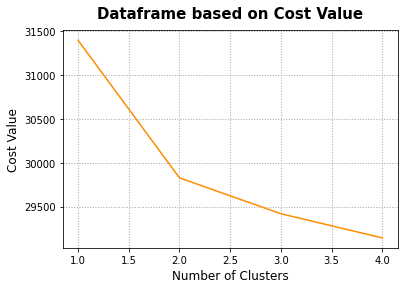

In [68]:
#plotting dataframe based on cost
y = np.array([i for i in range(1,5,1)])
plt.plot(y, cost, color = 'darkorange')
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Dataframe based on Cost Value', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Cost Value', fontsize = 12)
plt.show()

In [69]:
#combining prediction of cluster with original dataframe
df_facebook_copy = df_facebook.copy()
df_facebook = df_facebook_copy.reset_index()

cluster_df = pd.DataFrame(y_kmodes_cao)
cluster_df.columns = ['cluster_predicted']
combine_df = pd.concat([df_facebook, cluster_df], axis = 1).reset_index()
combine_df = combine_df.drop(columns = ['index', 'level_0'], axis = 1)
combine_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_predicted
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,2
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


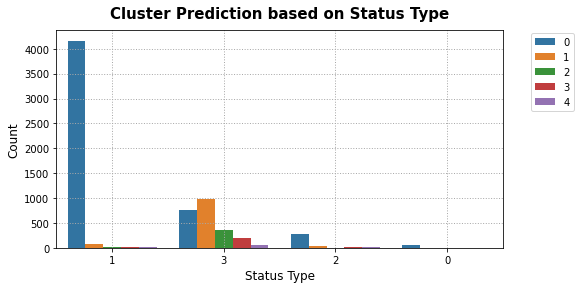

In [70]:
#visualize the result based on attribute
plt.figure(figsize = (8,4))
sns.countplot(x = combine_df['status_type'], order = combine_df['status_type'].value_counts().index, 
              hue = combine_df['cluster_predicted'])
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 1)
plt.title('Cluster Prediction based on Status Type', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Status Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.legend(loc = 'right', bbox_to_anchor = (1.17, 0.81), ncol = 1)
plt.show()

## K-Medoids Clustering

In [71]:
#define function for initialization of medoids
def init_medoids(X, k):
    samples = choice(len(X), size = k, replace = False)
    return X.iloc[samples, :]

medoids_initial = init_medoids(df_norm, 3)
print(medoids_initial)

      status_type  num_reactions  num_comments  num_shares  num_likes  \
3446     0.333333       0.028875      0.001286    0.001168   0.028025   
3757     0.333333       0.003185      0.000000    0.000000   0.003185   
2801     0.333333       0.001062      0.000000    0.000000   0.001062   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
3446   0.004566  0.003597        0.0       0.0         0.0  
3757   0.000000  0.000000        0.0       0.0         0.0  
2801   0.000000  0.000000        0.0       0.0         0.0  


In [72]:
#define function for distances of medoids
def distance(X, medoids):
    m = len(X)
    X = X.values
    medoids_shape = medoids.shape
    
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)
    S = np.empty((m, k))
    
    for i in range(m):
        S[i, :] = np.linalg.norm(medoids - X[i, :], axis = 1).reshape(1, len(medoids))
    return S

print('==========EUCLIDEAN DISTANCE==========\n')
first_distance = distance(df_norm, medoids_initial)
np.set_printoptions(threshold = 5)
print(first_distance)

==========EUCLIDEAN DISTANCE==========

[[6.93182874e-01 7.00565678e-01 7.01170896e-01]
 [7.76203320e-03 4.05347836e-02 4.35373602e-02]
 [6.67968063e-01 6.70491852e-01 6.70768112e-01]
 ...
 [4.01024446e-02 4.33242688e-03 1.85570213e-03]
 [6.51900975e-02 1.00839348e-01 1.03834608e-01]
 [3.56552480e-02 6.00515313e-04 3.60309188e-03]]


In [73]:
#define function for result of first clustering
def clustering(S):
    return np.argmin(S, axis = 1)

first_cluster = clustering(first_distance)
print('===========================RESULT FIRST CLUSTERING==========================\n')
np.set_printoptions(threshold = np.inf)
print(first_cluster)

===========================RESULT FIRST CLUSTERING==========================

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 2 2 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [74]:
#check silhouette coefficient
silhouette_avg = silhouette_score(df_norm, first_cluster)
print('Silhouette Score : ', silhouette_avg)

Silhouette Score :  0.030899748535512802


In [75]:
#PCA transformation
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(df_norm)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component I', 'principal component II', 
                                                             'principal component III'])

datapoints = PCAdf.values
PCAdf.head()

,principal component I,principal component II,principal component III
0,0.446218,0.068944,0.069631
1,-0.237240,-0.010435,0.000432
2,0.429787,-0.028372,-0.030774
3,-0.237808,-0.021956,0.002411
4,-0.235285,0.008596,0.007529


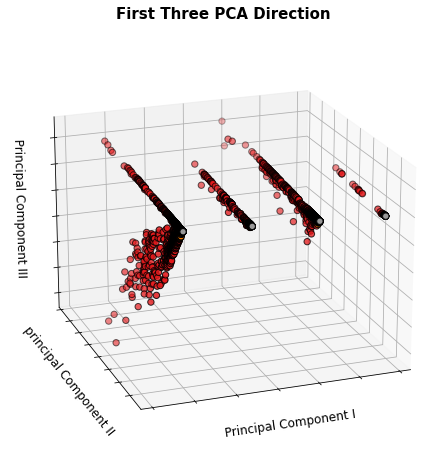

In [76]:
#visualize PCA transformation
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev = 200, azim = 110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = first_cluster, cmap = plt.cm.Set1, edgecolor = 'k', s = 40)
ax.set_title('First Three PCA Direction', fontsize = 15, pad = 12, fontweight = 'bold')
ax.set_xlabel('Principal Component I', fontsize = 12)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('principal Component II', fontsize = 12)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Principal Component III', fontsize = 12)
ax.w_zaxis.set_ticklabels([])
plt.show()

In [77]:
#adding result cluster to original dataframe
df_facebook['Cluster'] = first_cluster
df_facebook = df_facebook.drop('index', axis = 1)
df_facebook.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
